In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
bikeSharing = pd.read_csv("https://ml-course2-upgrad.s3.amazonaws.com/Linear+Regression+Assignment/Bike+Sharing+Assignment/day.csv", index_col=False)

In [3]:
bikeSharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bikeSharing.shape

(730, 16)

In [5]:
bikeSharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
bikeSharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
bikeSharing = bikeSharing.drop(['instant','casual','registered'],axis=1)

In [8]:
bikeSharing['weekday'].value_counts()

weekday
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: count, dtype: int64

In [9]:
# Altering column data so that it marks Sunday or non-Sunday
# All other values are almost equally distributed except for on Sundays. 
bikeSharing = bikeSharing.drop(['weekday'],axis=1)  

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

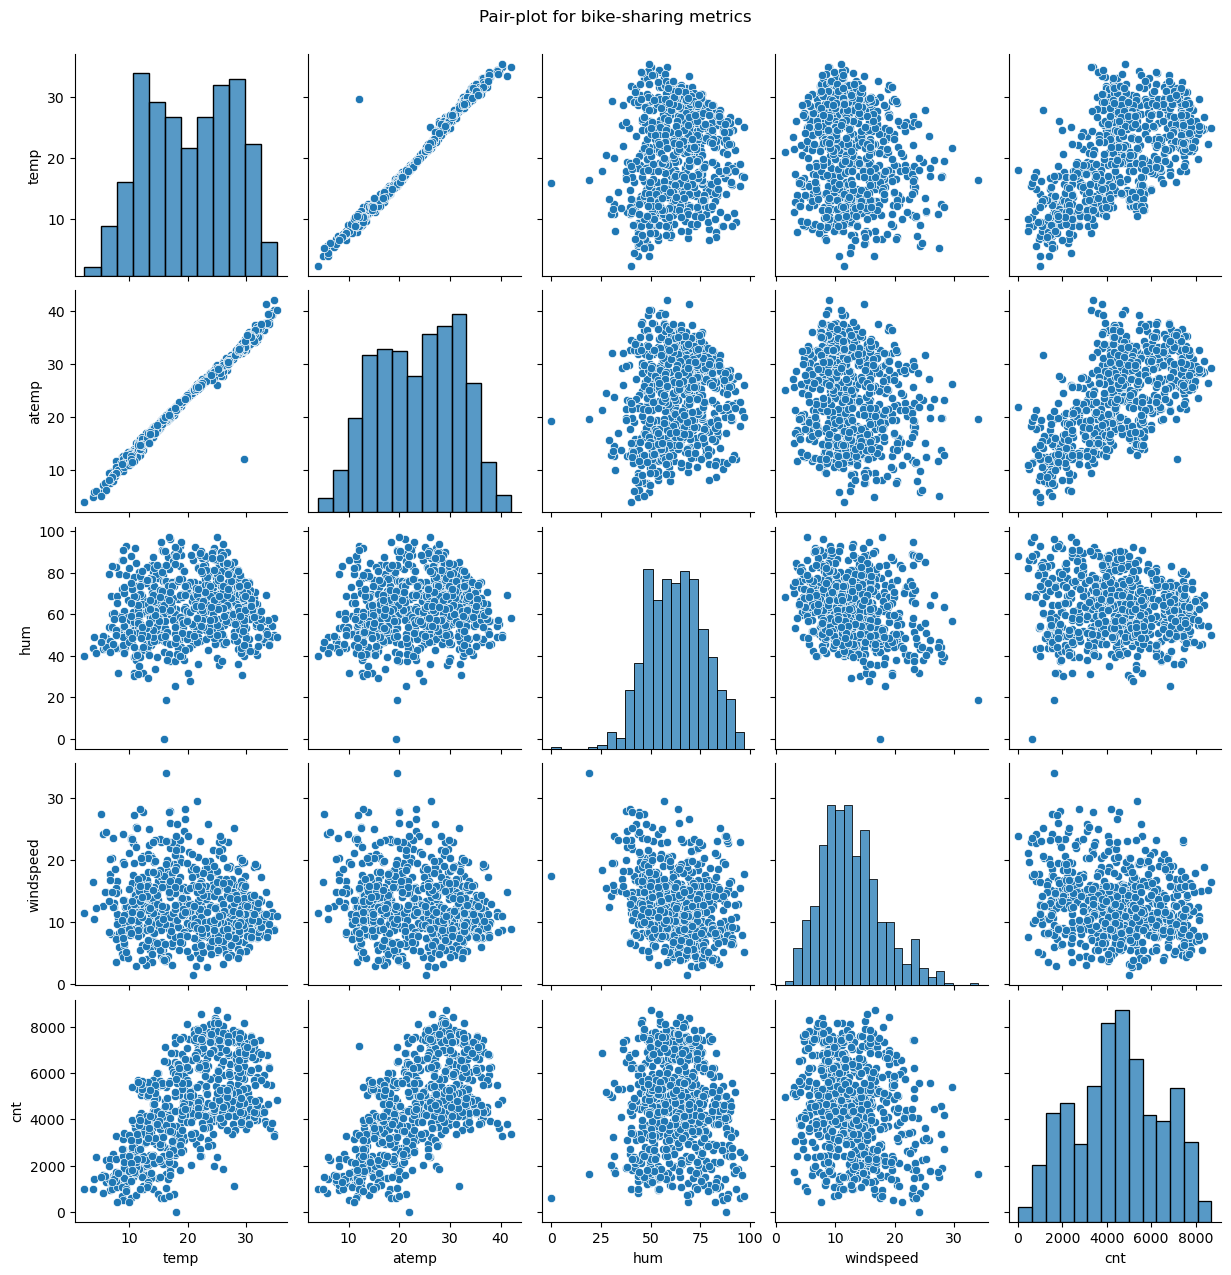

In [11]:
sns.pairplot(bikeSharing[['temp', 'atemp', 'hum', 'windspeed', 'cnt']])
plt.suptitle('Pair-plot for bike-sharing metrics', y=1.02)
plt.show()

In [12]:
# Categorical Variables to map to get clarity during EDA

def getWeatherValue(x):
    if (x==1):
        return 'Clear'
    elif(x==2):
        return 'Misty'
    elif(x==3):
        return 'Light Rain'
    else:
        return 'Rain'


def getMonthValue(x):
    if (x==1):
        return 'Jan'
    elif(x==2):
        return 'Feb'
    elif(x==3):
        return 'Mar'
    elif(x==4):
        return 'Apr'
    elif(x==5):
        return 'May'
    elif(x==6):
        return 'Jun'
    elif(x==7):
        return 'Jul'
    elif(x==8):
        return 'Aug'
    elif(x==9):
        return 'Sep'
    elif(x==10):
        return 'Oct'
    elif(x==11):
        return 'Nov'
    else:
        return 'Dec'    

    
def getWeekday(x):
    if (x==1):
        return 'Mon'
    elif(x==2):
        return 'Tue'
    elif(x==3):
        return 'Wed'
    elif(x==4):
        return 'Thu'
    elif(x==5):
        return 'Fri'
    elif(x==6):
        return 'Sat'
    elif(x==7):
        return 'Sun'
    

bikeSharing['holidayEDA'] = bikeSharing['holiday'].apply(lambda x: 'Holiday' if x == 1 else 'Not Holiday')
bikeSharing['workingdayEDA'] = bikeSharing['workingday'].apply(lambda x: 'Working Day' if x == 1 else 'Not Working Day')
bikeSharing['weathersitEDA'] = bikeSharing['weathersit'].apply(lambda x: getWeatherValue(x))
bikeSharing['monthEDA'] = bikeSharing['mnth'].apply(lambda x: getMonthValue(x))


In [13]:
bikeSharing['yrEDA'] = bikeSharing['yr'].apply(lambda x: '2018' if x == 0 else '2019')
bikeSharing['seasonEDA'] = bikeSharing['season'].apply(
    lambda x: 'spring' if x == 1 else ('summer' if x == 2 else ('fall' if x == 3 else 'winter')))


In [14]:
bikeSharing.head(50)

,dteday,season,yr,mnth,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,holidayEDA,workingdayEDA,weathersitEDA,monthEDA,yrEDA,seasonEDA
0,01-01-2018,1,0,1,0,0,2,14.110847,18.181250,80.5833,10.749882,985,Not Holiday,Not Working Day,Misty,Jan,2018,spring
1,02-01-2018,1,0,1,0,0,2,14.902598,17.686950,69.6087,16.652113,801,Not Holiday,Not Working Day,Misty,Jan,2018,spring
2,03-01-2018,1,0,1,0,1,1,8.050924,9.470250,43.7273,16.636703,1349,Not Holiday,Working Day,Clear,Jan,2018,spring
3,04-01-2018,1,0,1,0,1,1,8.200000,10.606100,59.0435,10.739832,1562,Not Holiday,Working Day,Clear,Jan,2018,spring
4,05-01-2018,1,0,1,0,1,1,9.305237,11.463500,43.6957,12.522300,1600,Not Holiday,Working Day,Clear,Jan,2018,spring
5,06-01-2018,1,0,1,0,1,1,8.378268,11.660450,51.8261,6.000868,1606,Not Holiday,Working Day,Clear,Jan,2018,spring
6,07-01-2018,1,0,1,0,1,2,8.057402,10.441950,49.8696,11.304642,1510,Not Holiday,Working Day,Misty,Jan,2018,spring
7,08-01-2018,1,0,1,0,0,2,6.765000,8.112700,53.5833,17.875868,959,Not Holiday,Not Working Day,Misty,Jan,2018,spring
8,09-01-2018,1,0,1,0,0,1,5.671653,5.808750,43.4167,24.250650,822,Not Holiday,Not Working Day,Clear,Jan,2018,spring
9,10-01-2018,1,0,1,0,1,1,6.184153,7.544400,48.2917,14.958889,1321,Not Holiday,Working Day,Clear,Jan,2018,spring


In [15]:
bikeSharing = bikeSharing.drop(['season', 'yr', 'mnth','holiday','workingday','weathersit',],axis=1)  

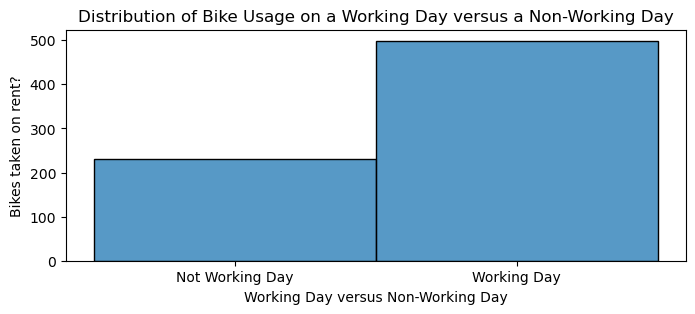

In [16]:
# Annual income distribution - this variable will give an insight inside the ability to pay of all the loan payers
plt.figure(figsize=(8, 3))
sns.histplot(data=bikeSharing, x='workingdayEDA')
plt.title('Distribution of Bike Usage on a Working Day versus a Non-Working Day')
plt.xlabel('Working Day versus Non-Working Day')
plt.ylabel('Bikes taken on rent?')
plt.show()

#### Insight #####
Working days contitute 5 days a week and non-working days 2 days. 
This shows that even if its a non-working day, the bikes taken on loan is quite a good number, for just 2 days.
The number of bikes taken on rent in 2 days, is half the number of bikes taken on rent in the remaining 5 days


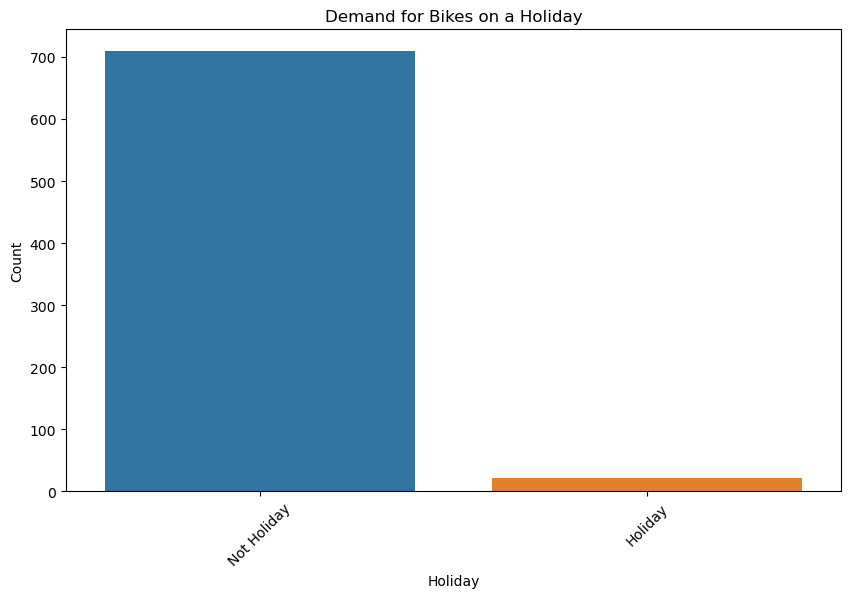

In [17]:

# Holiday Bike Demand
plt.figure(figsize=(10, 6))
sns.countplot(data=bikeSharing, x='holidayEDA')
plt.title('Demand for Bikes on a Holiday')
plt.xlabel('Holiday')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#### Insight #####
On Holidays, people generally don't prefer to travel shorter distances using bikes. 

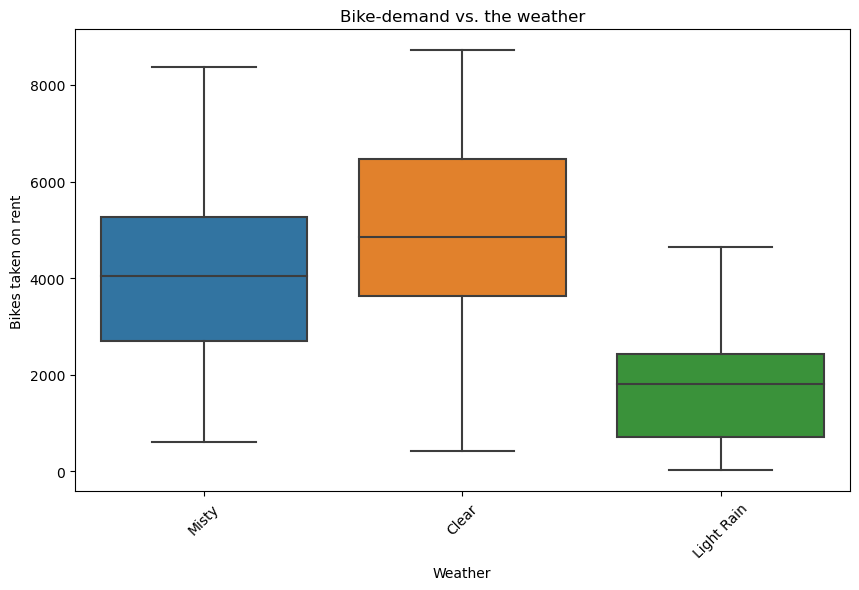

In [18]:
# Create a boxplot to visualize the relationship between the bike-demand and the weather
plt.figure(figsize=(10, 6))
sns.boxplot(x='weathersitEDA', y='cnt', data=bikeSharing)
plt.title('Bike-demand vs. the weather')
plt.xlabel('Weather')
plt.ylabel('Bikes taken on rent')
plt.xticks(rotation=45)  # Rotate labels if they overlap or are too long
plt.show()

#### Insight #####

Highest bike-demand is during a clear weather or a weather which is partly cloudy. 

In slight mist, slight demand reduced as compared to when it was clear weather. 

In a weather with partial rains, or partial snowfall, the demand reduced to 1/3rd of when its highest in demand. 

During heavy rain, its quite obvious that nobody rents out the bike, as the data shows.

<BarContainer object of 2 artists>

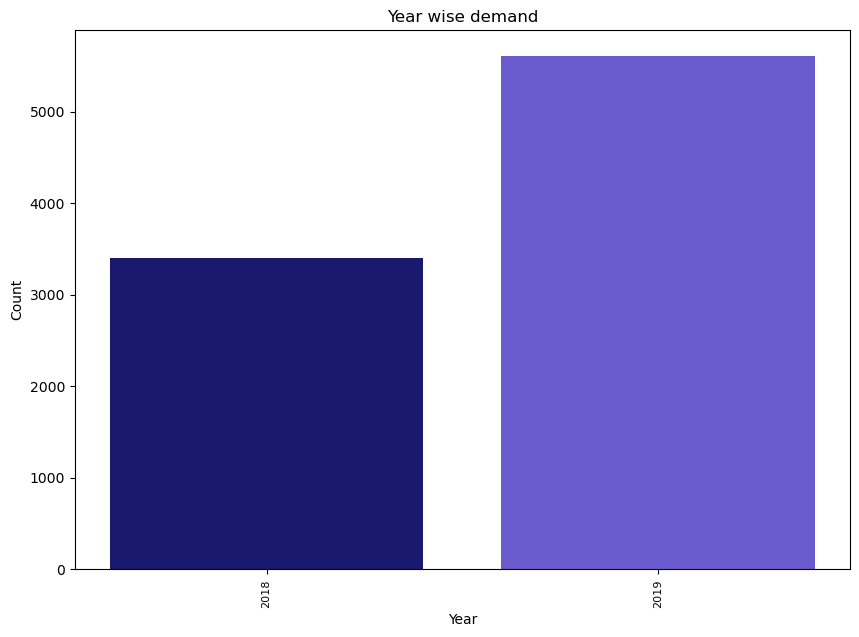

In [19]:
groupByYearCnt = bikeSharing.groupby('yrEDA').cnt.mean()

x = groupByYearCnt.index.tolist()
y = groupByYearCnt.values.tolist()

fig = plt.figure(figsize =(10, 7))

# set axis labels
plt.xlabel('Year')
plt.ylabel('Count')

# set title
plt.title('Year wise demand')

# set xticks 
plt.xticks(labels=x, ticks=np.arange(len(x)),rotation='vertical', fontsize=8)

plt.bar(x, y, color=['midnightblue', 'slateblue', 'darkorchid', 'plum'])

#### Insight #####

Its possible that due to more awareness on eco-friendliness, year-after-year, people will use more rented bikes as compared to using their own cars. This trend can be stated only if we have the data of a couple of years. 

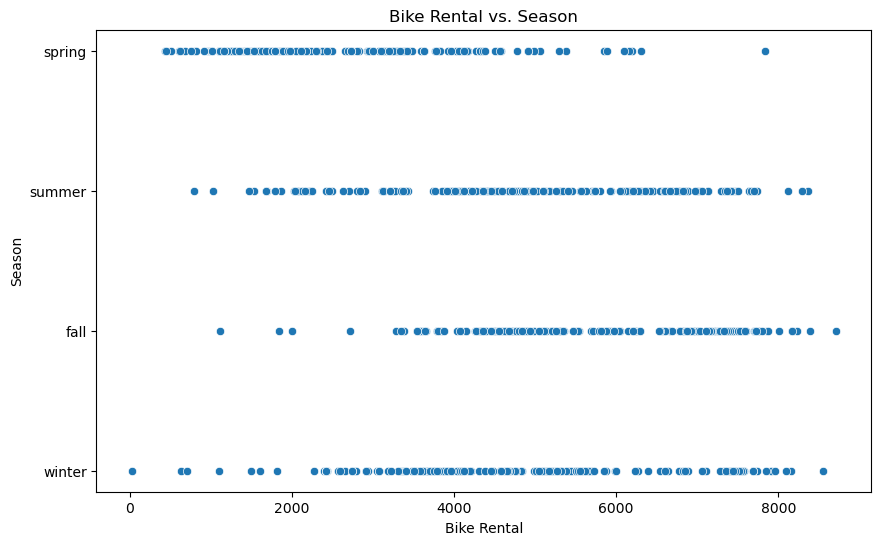

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=bikeSharing, x='cnt', y='seasonEDA')
plt.title('Bike Rental vs. Season')
plt.xlabel('Bike Rental')
plt.ylabel('Season')
plt.show()

#### Insight #####


No specific useful insights from seasonal inference. In all seasons, there is a good demand, except spring where people are likely to go for longer travels, and use the bikes lesser in number. 

In [21]:
# # The date of bike rental is not of much significance, hence dropping it
bikeSharing = bikeSharing.drop(['dteday'],axis=1)  

# Creating dummies for categorical features


In [22]:
bikeSharing_Dms = pd.get_dummies(bikeSharing, 
                          columns=['seasonEDA', 'yrEDA', 'monthEDA','holidayEDA','workingdayEDA','weathersitEDA'], 
                          drop_first=True)


# Convert any boolean columns to 1s and 0s, if necessary
bikeSharing_Dms = bikeSharing_Dms.astype(int)

# Display the dataframe with the new dummy variables
print(bikeSharing_Dms.head())



   temp  atemp  hum  windspeed   cnt  seasonEDA_spring  seasonEDA_summer  \
0    14     18   80         10   985                 1                 0   
1    14     17   69         16   801                 1                 0   
2     8      9   43         16  1349                 1                 0   
3     8     10   59         10  1562                 1                 0   
4     9     11   43         12  1600                 1                 0   

   seasonEDA_winter  yrEDA_2019  monthEDA_Aug  ...  monthEDA_Jun  \
0                 0           0             0  ...             0   
1                 0           0             0  ...             0   
2                 0           0             0  ...             0   
3                 0           0             0  ...             0   
4                 0           0             0  ...             0   

   monthEDA_Mar  monthEDA_May  monthEDA_Nov  monthEDA_Oct  monthEDA_Sep  \
0             0             0             0             0  

#### Insight #####

Favtors like the temperature, and the feeling temperature have highest impact on bike-rentals. People rented bikes only if they felt good about riding it, and felt that it would be a favorable weather to commute. 
There was a surge in the bike-rentals year after year. 
Season also had an impact on the bike-rental. 
The month of the year also impacts the rentals. 

In [23]:
bikeSharing_Dms.head()

,temp,atemp,hum,windspeed,cnt,seasonEDA_spring,seasonEDA_summer,seasonEDA_winter,yrEDA_2019,monthEDA_Aug,...,monthEDA_Jun,monthEDA_Mar,monthEDA_May,monthEDA_Nov,monthEDA_Oct,monthEDA_Sep,holidayEDA_Not Holiday,workingdayEDA_Working Day,weathersitEDA_Light Rain,weathersitEDA_Misty
0,14,18,80,10,985,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,14,17,69,16,801,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,8,9,43,16,1349,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,8,10,59,10,1562,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4,9,11,43,12,1600,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [24]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
trainingData, testData = train_test_split(bikeSharing_Dms, train_size = 0.7, test_size = 0.3, random_state = 100)


In [25]:
# Scaling the Features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_vars = ['temp','atemp','hum','windspeed','cnt']

trainingData[num_vars] = scaler.fit_transform(trainingData[num_vars])

In [26]:

y_train = trainingData.pop('cnt')
X_train = trainingData

In [27]:
X_train.head()

,temp,atemp,hum,windspeed,seasonEDA_spring,seasonEDA_summer,seasonEDA_winter,yrEDA_2019,monthEDA_Aug,monthEDA_Dec,...,monthEDA_Jun,monthEDA_Mar,monthEDA_May,monthEDA_Nov,monthEDA_Oct,monthEDA_Sep,holidayEDA_Not Holiday,workingdayEDA_Working Day,weathersitEDA_Light Rain,weathersitEDA_Misty
653,0.515152,0.512821,0.567010,0.31250,0,0,1,1,0,0,...,0,0,0,0,1,0,1,1,0,0
576,0.818182,0.769231,0.721649,0.28125,0,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
426,0.424242,0.435897,0.639175,0.25000,1,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,1
728,0.242424,0.205128,0.494845,0.65625,1,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
482,0.393939,0.384615,0.494845,0.18750,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1


In [28]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

In [29]:
#Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

model_1 = sm.OLS(y_train, X_train_lm).fit()

model_1.params

const                        0.247020
temp                         0.371373
atemp                        0.082403
hum                         -0.167160
windspeed                   -0.186032
seasonEDA_spring            -0.048113
seasonEDA_summer             0.039054
seasonEDA_winter             0.103815
yrEDA_2019                   0.230484
monthEDA_Aug                 0.022933
monthEDA_Dec                -0.040272
monthEDA_Feb                -0.034254
monthEDA_Jan                -0.061479
monthEDA_Jul                -0.035223
monthEDA_Jun                 0.002018
monthEDA_Mar                 0.004988
monthEDA_May                 0.025841
monthEDA_Nov                -0.039552
monthEDA_Oct                 0.008753
monthEDA_Sep                 0.087919
holidayEDA_Not Holiday       0.075842
workingdayEDA_Working Day    0.016114
weathersitEDA_Light Rain    -0.248634
weathersitEDA_Misty         -0.057137
dtype: float64

In [30]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     117.6
Date:                Mon, 16 Sep 2024   Prob (F-statistic):          5.40e-182
Time:                        18:16:10   Log-Likelihood:                 518.38
No. Observations:                 510   AIC:                            -988.8
Df Residuals:                     486   BIC:                            -887.1
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.2470      0.051      4.820      0.000       0.146       0.348
temp                          0.3714      0.134      2.769      0.006       0.108       0.635
atemp                         0.0824      0.134      0.617      0.537      -0.180       0.345
hum                          -0.1672      0.039     -4.299      0.000      -0.244      -0.091
windspeed                    -0.1860      0.027     -6.819      0.000      -0.240      -0.132
seasonEDA_spring             -0.0481      0.030     -1.585      0.114      -0.108       0.012
seasonEDA_summer              0.0391      0.027      1.471      0.142      -0.013       0.091
seasonEDA_winter              0.1038      0.028      3.672      0.000       0.048       0.159
yrEDA_2019                    0.2305      0.008     28.237      0.000       0.214       0.247
monthEDA_Aug                  0.0229      0.034      0.666      0.506      -0.045       0.091
monthEDA_Dec                 -0.0403      0.034     -1.186      0.236      -0.107       0.026
monthEDA_Feb                 -0.0343      0.033     -1.028      0.305      -0.100       0.031
monthEDA_Jan                 -0.0615      0.034     -1.811      0.071      -0.128       0.005
monthEDA_Jul                 -0.0352      0.036     -0.987      0.324      -0.105       0.035
monthEDA_Jun                  0.0020      0.026      0.079      0.937      -0.048       0.052
monthEDA_Mar                  0.0050      0.025      0.201      0.841      -0.044       0.054
monthEDA_May                  0.0258      0.021      1.207      0.228      -0.016       0.068
monthEDA_Nov                 -0.0396      0.037     -1.076      0.282      -0.112       0.033
monthEDA_Oct                  0.0088      0.036      0.241      0.810      -0.063       0.080
monthEDA_Sep                  0.0879      0.032      2.706      0.007       0.024       0.152
holidayEDA_Not Holiday        0.0758      0.027      2.858      0.004       0.024       0.128
workingdayEDA_Working Day     0.0161      0.009      1.829      0.068      -0.001       0.033
weathersitEDA_Light Rain     -0.2486      0.027     -9.338      0.000      -0.301      -0.196
weathersitEDA_Misty          -0.0571      0.011     -5.434      0.000      -0.078      -0.036
==============================================================================
Omnibus:                       72.600   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              208.992
Skew:                          -0.681   Prob(JB):                     4.15e-46
Kurtosis:                       5.825   Cond. No.                         96.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the er

## Create a function for calculating VIF

In [31]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
def getVifValues(dataset):
    vif = pd.DataFrame()
    vif['Features'] = dataset.columns
    vif['VIF'] = [variance_inflation_factor(dataset.values, i) for i in range(dataset.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [32]:
print(getVifValues(X_train))

                     Features     VIF
0                        temp  376.71
1                       atemp  344.55
2                         hum   38.25
19     holidayEDA_Not Holiday   32.48
4            seasonEDA_spring   12.32
6            seasonEDA_winter   12.10
5            seasonEDA_summer    7.77
17               monthEDA_Oct    6.47
8                monthEDA_Aug    6.35
16               monthEDA_Nov    6.07
3                   windspeed    5.65
12               monthEDA_Jul    5.57
11               monthEDA_Jan    5.39
9                monthEDA_Dec    5.07
18               monthEDA_Sep    4.48
10               monthEDA_Feb    4.07
14               monthEDA_Mar    3.48
20  workingdayEDA_Working Day    3.33
13               monthEDA_Jun    3.01
15               monthEDA_May    2.45
22        weathersitEDA_Misty    2.36
7                  yrEDA_2019    2.14
21   weathersitEDA_Light Rain    1.30


## Remove High p value ( > 0.05), High VIF ( > 5), in the order of high value


### Remove High p value, High VIF -> monthEDA_Oct -> 0.810 (p), 6.47 (VIF)


In [33]:
X_train_for_model_1_5 = X_train.drop('monthEDA_Oct', axis=1)

In [34]:
# Build a third fitted model
X_train_lm = sm.add_constant(X_train_for_model_1_5)

model_1_5 = sm.OLS(y_train, X_train_lm).fit()

model_1_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     123.2
Date:                Mon, 16 Sep 2024   Prob (F-statistic):          4.95e-183
Time:                        18:16:10   Log-Likelihood:                 518.35
No. Observations:                 510   AIC:                            -990.7
Df Residuals:                     487   BIC:                            -893.3
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.2510      0.049      5.171      0.000       0.156       0.346
temp                          0.3715      0.134      2.772      0.006       0.108       0.635
atemp                         0.0819      0.133      0.614      0.539      -0.180       0.344
hum                          -0.1660      0.039     -4.305      0.000      -0.242      -0.090
windspeed                    -0.1860      0.027     -6.825      0.000      -0.240      -0.132
seasonEDA_spring             -0.0481      0.030     -1.587      0.113      -0.108       0.011
seasonEDA_summer              0.0364      0.024      1.512      0.131      -0.011       0.084
seasonEDA_winter              0.1071      0.025      4.346      0.000       0.059       0.156
yrEDA_2019                    0.2304      0.008     28.280      0.000       0.214       0.246
monthEDA_Aug                  0.0189      0.030      0.628      0.530      -0.040       0.078
monthEDA_Dec                 -0.0468      0.021     -2.280      0.023      -0.087      -0.006
monthEDA_Feb                 -0.0384      0.029     -1.342      0.180      -0.095       0.018
monthEDA_Jan                 -0.0656      0.029     -2.247      0.025      -0.123      -0.008
monthEDA_Jul                 -0.0392      0.032     -1.241      0.215      -0.101       0.023
monthEDA_Jun                 -0.0003      0.024     -0.011      0.991      -0.047       0.046
monthEDA_Mar                  0.0019      0.021      0.089      0.929      -0.040       0.044
monthEDA_May                  0.0244      0.021      1.187      0.236      -0.016       0.065
monthEDA_Nov                 -0.0471      0.020     -2.411      0.016      -0.085      -0.009
monthEDA_Sep                  0.0830      0.025      3.267      0.001       0.033       0.133
holidayEDA_Not Holiday        0.0755      0.026      2.853      0.005       0.024       0.128
workingdayEDA_Working Day     0.0161      0.009      1.826      0.068      -0.001       0.033
weathersitEDA_Light Rain     -0.2485      0.027     -9.344      0.000      -0.301      -0.196
weathersitEDA_Misty          -0.0572      0.010     -5.450      0.000      -0.078      -0.037
==============================================================================
Omnibus:                       71.838   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              206.047
Skew:                          -0.675   Prob(JB):                     1.81e-45
Kurtosis:                       5.806   Cond. No.                         96.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
print(getVifValues(X_train_for_model_1_5))

                     Features     VIF
0                        temp  375.95
1                       atemp  344.54
2                         hum   36.08
18     holidayEDA_Not Holiday   31.86
4            seasonEDA_spring   12.12
6            seasonEDA_winter    7.82
5            seasonEDA_summer    7.01
3                   windspeed    5.59
8                monthEDA_Aug    5.22
12               monthEDA_Jul    4.66
11               monthEDA_Jan    4.36
19  workingdayEDA_Working Day    3.33
10               monthEDA_Feb    3.25
17               monthEDA_Sep    3.03
14               monthEDA_Mar    2.72
13               monthEDA_Jun    2.66
21        weathersitEDA_Misty    2.34
15               monthEDA_May    2.24
7                  yrEDA_2019    2.14
9                monthEDA_Dec    2.06
16               monthEDA_Nov    1.90
20   weathersitEDA_Light Rain    1.30


### Remove High p value, High VIF -> atemp -> 0.539 (p), 344.54 (VIF)


In [36]:
X_train_for_model_2 = X_train_for_model_1_5.drop('atemp', axis=1)

In [37]:
# Build a third fitted model
X_train_lm = sm.add_constant(X_train_for_model_2)

model_2 = sm.OLS(y_train, X_train_lm).fit()

model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     129.2
Date:                Mon, 16 Sep 2024   Prob (F-statistic):          5.18e-184
Time:                        18:16:10   Log-Likelihood:                 518.15
No. Observations:                 510   AIC:                            -992.3
Df Residuals:                     488   BIC:                            -899.1
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.2519      0.048      5.195      0.000       0.157       0.347
temp                          0.4486      0.047      9.596      0.000       0.357       0.540
hum                          -0.1651      0.039     -4.286      0.000      -0.241      -0.089
windspeed                    -0.1893      0.027     -7.092      0.000      -0.242      -0.137
seasonEDA_spring             -0.0476      0.030     -1.573      0.116      -0.107       0.012
seasonEDA_summer              0.0371      0.024      1.544      0.123      -0.010       0.084
seasonEDA_winter              0.1076      0.025      4.370      0.000       0.059       0.156
yrEDA_2019                    0.2302      0.008     28.295      0.000       0.214       0.246
monthEDA_Aug                  0.0164      0.030      0.551      0.582      -0.042       0.075
monthEDA_Dec                 -0.0469      0.021     -2.289      0.023      -0.087      -0.007
monthEDA_Feb                 -0.0386      0.029     -1.351      0.177      -0.095       0.018
monthEDA_Jan                 -0.0662      0.029     -2.268      0.024      -0.124      -0.009
monthEDA_Jul                 -0.0405      0.031     -1.286      0.199      -0.102       0.021
monthEDA_Jun                 -0.0019      0.024     -0.079      0.937      -0.048       0.044
monthEDA_Mar                  0.0018      0.021      0.085      0.932      -0.040       0.043
monthEDA_May                  0.0233      0.020      1.139      0.255      -0.017       0.064
monthEDA_Nov                 -0.0470      0.020     -2.408      0.016      -0.085      -0.009
monthEDA_Sep                  0.0821      0.025      3.240      0.001       0.032       0.132
holidayEDA_Not Holiday        0.0764      0.026      2.890      0.004       0.024       0.128
workingdayEDA_Working Day     0.0161      0.009      1.830      0.068      -0.001       0.033
weathersitEDA_Light Rain     -0.2499      0.026     -9.438      0.000      -0.302      -0.198
weathersitEDA_Misty          -0.0574      0.010     -5.473      0.000      -0.078      -0.037
==============================================================================
Omnibus:                       71.227   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              204.383
Skew:                          -0.669   Prob(JB):                     4.16e-45
Kurtosis:                       5.798   Cond. No.                         32.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
print(getVifValues(X_train_for_model_2))

                     Features    VIF
0                        temp  37.24
1                         hum  35.97
17     holidayEDA_Not Holiday  31.66
3            seasonEDA_spring  12.10
5            seasonEDA_winter   7.80
4            seasonEDA_summer   6.97
2                   windspeed   5.37
7                monthEDA_Aug   5.13
11               monthEDA_Jul   4.64
10               monthEDA_Jan   4.35
18  workingdayEDA_Working Day   3.33
9                monthEDA_Feb   3.25
16               monthEDA_Sep   3.03
13               monthEDA_Mar   2.72
12               monthEDA_Jun   2.63
20        weathersitEDA_Misty   2.34
14               monthEDA_May   2.22
6                  yrEDA_2019   2.14
8                monthEDA_Dec   2.06
15               monthEDA_Nov   1.90
19   weathersitEDA_Light Rain   1.29


### Remove High p value, High VIF -> monthEDA_Aug -> 0.582 (p), 5.13 (VIF)


In [39]:
X_train_for_model_4 = X_train_for_model_2.drop('monthEDA_Aug', axis=1)

In [40]:
# Build a third fitted model
X_train_lm = sm.add_constant(X_train_for_model_4)

model_4 = sm.OLS(y_train, X_train_lm).fit()

model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     135.8
Date:                Mon, 16 Sep 2024   Prob (F-statistic):          5.10e-185
Time:                        18:16:10   Log-Likelihood:                 517.99
No. Observations:                 510   AIC:                            -994.0
Df Residuals:                     489   BIC:                            -905.1
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.2581      0.047      5.477      0.000       0.165       0.351
temp                          0.4575      0.044     10.422      0.000       0.371       0.544
hum                          -0.1660      0.038     -4.316      0.000      -0.241      -0.090
windspeed                    -0.1904      0.027     -7.157      0.000      -0.243      -0.138
seasonEDA_spring             -0.0563      0.026     -2.174      0.030      -0.107      -0.005
seasonEDA_summer              0.0285      0.018      1.557      0.120      -0.007       0.065
seasonEDA_winter              0.0984      0.018      5.457      0.000       0.063       0.134
yrEDA_2019                    0.2301      0.008     28.312      0.000       0.214       0.246
monthEDA_Dec                 -0.0471      0.020     -2.299      0.022      -0.087      -0.007
monthEDA_Feb                 -0.0387      0.029     -1.354      0.176      -0.095       0.017
monthEDA_Jan                 -0.0657      0.029     -2.254      0.025      -0.123      -0.008
monthEDA_Jul                 -0.0544      0.019     -2.864      0.004      -0.092      -0.017
monthEDA_Jun                 -0.0096      0.019     -0.507      0.612      -0.047       0.028
monthEDA_Mar                  0.0006      0.021      0.027      0.978      -0.041       0.042
monthEDA_May                  0.0198      0.019      1.019      0.309      -0.018       0.058
monthEDA_Nov                 -0.0474      0.019     -2.431      0.015      -0.086      -0.009
monthEDA_Sep                  0.0718      0.017      4.205      0.000       0.038       0.105
holidayEDA_Not Holiday        0.0775      0.026      2.942      0.003       0.026       0.129
workingdayEDA_Working Day     0.0159      0.009      1.812      0.071      -0.001       0.033
weathersitEDA_Light Rain     -0.2504      0.026     -9.468      0.000      -0.302      -0.198
weathersitEDA_Misty          -0.0571      0.010     -5.454      0.000      -0.078      -0.037
==============================================================================
Omnibus:                       71.380   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              202.365
Skew:                          -0.675   Prob(JB):                     1.14e-44
Kurtosis:                       5.775   Cond. No.                         32.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
print(getVifValues(X_train_for_model_4))

                     Features    VIF
1                         hum  35.90
16     holidayEDA_Not Holiday  29.90
0                        temp  27.44
3            seasonEDA_spring   9.34
2                   windspeed   5.37
5            seasonEDA_winter   4.38
9                monthEDA_Jan   4.31
4            seasonEDA_summer   4.25
17  workingdayEDA_Working Day   3.32
8                monthEDA_Feb   3.24
12               monthEDA_Mar   2.71
19        weathersitEDA_Misty   2.34
6                  yrEDA_2019   2.13
7                monthEDA_Dec   2.06
13               monthEDA_May   1.96
14               monthEDA_Nov   1.89
10               monthEDA_Jul   1.75
11               monthEDA_Jun   1.67
15               monthEDA_Sep   1.45
18   weathersitEDA_Light Rain   1.29


## Once High p value, High VIF values are cleared, we need to address High p value, Low VIF features

### Remove High p value, Low VIF -> monthEDA_Mar -> 0.978 (p), 2.71 (VIF)

In [42]:
X_train_for_model_5 = X_train_for_model_4.drop('monthEDA_Mar', axis=1)

In [43]:
# Build a third fitted model
X_train_lm = sm.add_constant(X_train_for_model_5)

model_5 = sm.OLS(y_train, X_train_lm).fit()

model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     143.3
Date:                Mon, 16 Sep 2024   Prob (F-statistic):          4.20e-186
Time:                        18:16:10   Log-Likelihood:                 517.99
No. Observations:                 510   AIC:                            -996.0
Df Residuals:                     490   BIC:                            -911.3
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.2583      0.047      5.551      0.000       0.167       0.350
temp                          0.4572      0.043     10.708      0.000       0.373       0.541
hum                          -0.1659      0.038     -4.321      0.000      -0.241      -0.090
windspeed                    -0.1904      0.027     -7.177      0.000      -0.243      -0.138
seasonEDA_spring             -0.0559      0.022     -2.506      0.013      -0.100      -0.012
seasonEDA_summer              0.0286      0.018      1.576      0.116      -0.007       0.064
seasonEDA_winter              0.0983      0.018      5.464      0.000       0.063       0.134
yrEDA_2019                    0.2301      0.008     28.350      0.000       0.214       0.246
monthEDA_Dec                 -0.0474      0.019     -2.559      0.011      -0.084      -0.011
monthEDA_Feb                 -0.0392      0.022     -1.797      0.073      -0.082       0.004
monthEDA_Jan                 -0.0662      0.022     -3.039      0.003      -0.109      -0.023
monthEDA_Jul                 -0.0544      0.019     -2.867      0.004      -0.092      -0.017
monthEDA_Jun                 -0.0097      0.019     -0.515      0.607      -0.047       0.027
monthEDA_May                  0.0197      0.019      1.042      0.298      -0.017       0.057
monthEDA_Nov                 -0.0475      0.019     -2.490      0.013      -0.085      -0.010
monthEDA_Sep                  0.0718      0.017      4.224      0.000       0.038       0.105
holidayEDA_Not Holiday        0.0775      0.026      2.947      0.003       0.026       0.129
workingdayEDA_Working Day     0.0159      0.009      1.818      0.070      -0.001       0.033
weathersitEDA_Light Rain     -0.2504      0.026     -9.478      0.000      -0.302      -0.198
weathersitEDA_Misty          -0.0571      0.010     -5.460      0.000      -0.078      -0.037
==============================================================================
Omnibus:                       71.419   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              202.721
Skew:                          -0.675   Prob(JB):                     9.54e-45
Kurtosis:                       5.778   Cond. No.                         31.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
print(getVifValues(X_train_for_model_5))

                     Features    VIF
1                         hum  35.64
15     holidayEDA_Not Holiday  29.35
0                        temp  26.62
3            seasonEDA_spring   6.08
2                   windspeed   5.37
5            seasonEDA_winter   4.38
4            seasonEDA_summer   4.04
16  workingdayEDA_Working Day   3.31
9                monthEDA_Jan   2.46
18        weathersitEDA_Misty   2.33
6                  yrEDA_2019   2.13
8                monthEDA_Feb   1.93
13               monthEDA_Nov   1.84
12               monthEDA_May   1.82
10               monthEDA_Jul   1.75
7                monthEDA_Dec   1.72
11               monthEDA_Jun   1.63
14               monthEDA_Sep   1.44
17   weathersitEDA_Light Rain   1.29


### Remove High p value, Low VIF -> monthEDA_Jun -> 0.607 (p), 1.63 (VIF)

In [45]:
X_train_for_model_6 = X_train_for_model_5.drop('monthEDA_Jun', axis=1)

In [46]:
# Build a third fitted model
X_train_lm = sm.add_constant(X_train_for_model_6)

model_6 = sm.OLS(y_train, X_train_lm).fit()

model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     151.4
Date:                Mon, 16 Sep 2024   Prob (F-statistic):          3.84e-187
Time:                        18:16:10   Log-Likelihood:                 517.85
No. Observations:                 510   AIC:                            -997.7
Df Residuals:                     491   BIC:                            -917.3
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.2620      0.046      5.704      0.000       0.172       0.352
temp                          0.4479      0.039     11.578      0.000       0.372       0.524
hum                          -0.1633      0.038     -4.294      0.000      -0.238      -0.089
windspeed                    -0.1894      0.026     -7.164      0.000      -0.241      -0.137
seasonEDA_spring             -0.0573      0.022     -2.584      0.010      -0.101      -0.014
seasonEDA_summer              0.0256      0.017      1.491      0.137      -0.008       0.059
seasonEDA_winter              0.0977      0.018      5.446      0.000       0.062       0.133
yrEDA_2019                    0.2305      0.008     28.547      0.000       0.215       0.246
monthEDA_Dec                 -0.0488      0.018     -2.665      0.008      -0.085      -0.013
monthEDA_Feb                 -0.0404      0.022     -1.869      0.062      -0.083       0.002
monthEDA_Jan                 -0.0682      0.021     -3.180      0.002      -0.110      -0.026
monthEDA_Jul                 -0.0516      0.018     -2.839      0.005      -0.087      -0.016
monthEDA_May                  0.0233      0.018      1.327      0.185      -0.011       0.058
monthEDA_Nov                 -0.0485      0.019     -2.563      0.011      -0.086      -0.011
monthEDA_Sep                  0.0729      0.017      4.327      0.000       0.040       0.106
holidayEDA_Not Holiday        0.0768      0.026      2.927      0.004       0.025       0.128
workingdayEDA_Working Day     0.0161      0.009      1.835      0.067      -0.001       0.033
weathersitEDA_Light Rain     -0.2508      0.026     -9.507      0.000      -0.303      -0.199
weathersitEDA_Misty          -0.0571      0.010     -5.471      0.000      -0.078      -0.037
==============================================================================
Omnibus:                       72.384   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              208.569
Skew:                          -0.679   Prob(JB):                     5.13e-46
Kurtosis:                       5.823   Cond. No.                         29.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
print(getVifValues(X_train_for_model_6))

                     Features    VIF
1                         hum  34.14
14     holidayEDA_Not Holiday  29.29
0                        temp  22.15
3            seasonEDA_spring   6.06
2                   windspeed   5.27
5            seasonEDA_winter   4.38
4            seasonEDA_summer   3.70
15  workingdayEDA_Working Day   3.31
9                monthEDA_Jan   2.41
17        weathersitEDA_Misty   2.33
6                  yrEDA_2019   2.11
8                monthEDA_Feb   1.92
12               monthEDA_Nov   1.83
7                monthEDA_Dec   1.70
10               monthEDA_Jul   1.61
11               monthEDA_May   1.60
13               monthEDA_Sep   1.41
16   weathersitEDA_Light Rain   1.28


### Remove High p value, Low VIF -> monthEDA_May -> 0.185 (p), 1.60 (VIF)


In [48]:
X_train_for_model_7 = X_train_for_model_6.drop('monthEDA_May', axis=1)

In [49]:
# Build a third fitted model
X_train_lm = sm.add_constant(X_train_for_model_7)

model_7 = sm.OLS(y_train, X_train_lm).fit()

model_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     160.0
Date:                Mon, 16 Sep 2024   Prob (F-statistic):          7.16e-188
Time:                        18:16:10   Log-Likelihood:                 516.94
No. Observations:                 510   AIC:                            -997.9
Df Residuals:                     492   BIC:                            -921.7
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.2506      0.045      5.550      0.000       0.162       0.339
temp                          0.4573      0.038     12.013      0.000       0.382       0.532
hum                          -0.1571      0.038     -4.159      0.000      -0.231      -0.083
windspeed                    -0.1910      0.026     -7.226      0.000      -0.243      -0.139
seasonEDA_spring             -0.0533      0.022     -2.425      0.016      -0.096      -0.010
seasonEDA_summer              0.0356      0.015      2.316      0.021       0.005       0.066
seasonEDA_winter              0.0999      0.018      5.586      0.000       0.065       0.135
yrEDA_2019                    0.2299      0.008     28.495      0.000       0.214       0.246
monthEDA_Dec                 -0.0473      0.018     -2.590      0.010      -0.083      -0.011
monthEDA_Feb                 -0.0390      0.022     -1.803      0.072      -0.081       0.003
monthEDA_Jan                 -0.0665      0.021     -3.103      0.002      -0.109      -0.024
monthEDA_Jul                 -0.0521      0.018     -2.863      0.004      -0.088      -0.016
monthEDA_Nov                 -0.0468      0.019     -2.477      0.014      -0.084      -0.010
monthEDA_Sep                  0.0729      0.017      4.324      0.000       0.040       0.106
holidayEDA_Not Holiday        0.0774      0.026      2.947      0.003       0.026       0.129
workingdayEDA_Working Day     0.0164      0.009      1.878      0.061      -0.001       0.034
weathersitEDA_Light Rain     -0.2527      0.026     -9.587      0.000      -0.305      -0.201
weathersitEDA_Misty          -0.0573      0.010     -5.481      0.000      -0.078      -0.037
==============================================================================
Omnibus:                       70.243   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              190.829
Skew:                          -0.678   Prob(JB):                     3.65e-42
Kurtosis:                       5.673   Cond. No.                         29.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
print(getVifValues(X_train_for_model_7))

                     Features    VIF
1                         hum  34.04
13     holidayEDA_Not Holiday  28.94
0                        temp  21.95
3            seasonEDA_spring   6.04
2                   windspeed   5.20
5            seasonEDA_winter   4.37
14  workingdayEDA_Working Day   3.31
4            seasonEDA_summer   3.08
9                monthEDA_Jan   2.41
16        weathersitEDA_Misty   2.33
6                  yrEDA_2019   2.10
8                monthEDA_Feb   1.92
11               monthEDA_Nov   1.83
7                monthEDA_Dec   1.70
10               monthEDA_Jul   1.61
12               monthEDA_Sep   1.41
15   weathersitEDA_Light Rain   1.28


### Remove High p value, Low VIF -> monthEDA_Feb -> 0.072 (p), 1.92 (VIF)

In [51]:
X_train_for_model_8 = X_train_for_model_7.drop('monthEDA_Feb', axis=1)

In [52]:
# Build a third fitted model
X_train_lm = sm.add_constant(X_train_for_model_8)

model_8 = sm.OLS(y_train, X_train_lm).fit()

model_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     169.0
Date:                Mon, 16 Sep 2024   Prob (F-statistic):          2.71e-188
Time:                        18:16:11   Log-Likelihood:                 515.26
No. Observations:                 510   AIC:                            -996.5
Df Residuals:                     493   BIC:                            -924.5
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.2353      0.044      5.294      0.000       0.148       0.323
temp                          0.4744      0.037     12.836      0.000       0.402       0.547
hum                          -0.1592      0.038     -4.207      0.000      -0.234      -0.085
windspeed                    -0.1894      0.026     -7.155      0.000      -0.241      -0.137
seasonEDA_spring             -0.0642      0.021     -3.032      0.003      -0.106      -0.023
seasonEDA_summer              0.0391      0.015      2.558      0.011       0.009       0.069
seasonEDA_winter              0.1017      0.018      5.682      0.000       0.067       0.137
yrEDA_2019                    0.2295      0.008     28.392      0.000       0.214       0.245
monthEDA_Dec                 -0.0374      0.017     -2.140      0.033      -0.072      -0.003
monthEDA_Jan                 -0.0457      0.018     -2.524      0.012      -0.081      -0.010
monthEDA_Jul                 -0.0532      0.018     -2.917      0.004      -0.089      -0.017
monthEDA_Nov                 -0.0416      0.019     -2.223      0.027      -0.078      -0.005
monthEDA_Sep                  0.0745      0.017      4.416      0.000       0.041       0.108
holidayEDA_Not Holiday        0.0803      0.026      3.055      0.002       0.029       0.132
workingdayEDA_Working Day     0.0162      0.009      1.847      0.065      -0.001       0.033
weathersitEDA_Light Rain     -0.2513      0.026     -9.515      0.000      -0.303      -0.199
weathersitEDA_Misty          -0.0570      0.010     -5.442      0.000      -0.078      -0.036
==============================================================================
Omnibus:                       65.468   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              177.521
Skew:                          -0.632   Prob(JB):                     2.83e-39
Kurtosis:                       5.599   Cond. No.                         28.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
print(getVifValues(X_train_for_model_8))

                     Features    VIF
1                         hum  33.60
12     holidayEDA_Not Holiday  28.84
0                        temp  21.25
2                   windspeed   5.20
3            seasonEDA_spring   5.05
5            seasonEDA_winter   4.37
13  workingdayEDA_Working Day   3.31
4            seasonEDA_summer   3.07
15        weathersitEDA_Misty   2.33
6                  yrEDA_2019   2.10
10               monthEDA_Nov   1.81
8                monthEDA_Jan   1.77
9                monthEDA_Jul   1.61
7                monthEDA_Dec   1.57
11               monthEDA_Sep   1.41
14   weathersitEDA_Light Rain   1.28


### Remove High p value, Low VIF -> workingdayEDA_Working Day -> 0.065 (p), 3.31 (VIF)¶

In [54]:
X_train_for_model_9 = X_train_for_model_8.drop('workingdayEDA_Working Day', axis=1)

In [55]:
# Build a third fitted model
X_train_lm = sm.add_constant(X_train_for_model_9)

model_9 = sm.OLS(y_train, X_train_lm).fit()

model_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.2
Date:                Mon, 16 Sep 2024   Prob (F-statistic):          1.08e-188
Time:                        18:16:11   Log-Likelihood:                 513.50
No. Observations:                 510   AIC:                            -995.0
Df Residuals:                     494   BIC:                            -927.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.2360      0.045      5.296      0.000       0.148       0.324
temp                         0.4759      0.037     12.850      0.000       0.403       0.549
hum                         -0.1603      0.038     -4.225      0.000      -0.235      -0.086
windspeed                   -0.1915      0.027     -7.222      0.000      -0.244      -0.139
seasonEDA_spring            -0.0645      0.021     -3.039      0.002      -0.106      -0.023
seasonEDA_summer             0.0391      0.015      2.549      0.011       0.009       0.069
seasonEDA_winter             0.1004      0.018      5.604      0.000       0.065       0.136
yrEDA_2019                   0.2299      0.008     28.376      0.000       0.214       0.246
monthEDA_Dec                -0.0373      0.017     -2.133      0.033      -0.072      -0.003
monthEDA_Jan                -0.0456      0.018     -2.515      0.012      -0.081      -0.010
monthEDA_Jul                -0.0545      0.018     -2.985      0.003      -0.090      -0.019
monthEDA_Nov                -0.0409      0.019     -2.178      0.030      -0.078      -0.004
monthEDA_Sep                 0.0747      0.017      4.419      0.000       0.042       0.108
holidayEDA_Not Holiday       0.0913      0.026      3.560      0.000       0.041       0.142
weathersitEDA_Light Rain    -0.2496      0.026     -9.433      0.000      -0.302      -0.198
weathersitEDA_Misty         -0.0563      0.010     -5.362      0.000      -0.077      -0.036
==============================================================================
Omnibus:                       68.921   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.784
Skew:                          -0.699   Prob(JB):                     2.23e-37
Kurtosis:                       5.447   Cond. No.                         26.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
print(getVifValues(X_train_for_model_9))

                    Features    VIF
1                        hum  33.60
12    holidayEDA_Not Holiday  26.55
0                       temp  21.23
2                  windspeed   5.19
3           seasonEDA_spring   5.05
5           seasonEDA_winter   4.37
4           seasonEDA_summer   3.07
14       weathersitEDA_Misty   2.32
6                 yrEDA_2019   2.10
10              monthEDA_Nov   1.81
8               monthEDA_Jan   1.77
9               monthEDA_Jul   1.60
7               monthEDA_Dec   1.57
11              monthEDA_Sep   1.41
13  weathersitEDA_Light Rain   1.28


## Once High p value, Low VIF values are cleared, we need to address Low p value, High VIF features

### Remove Low p value, High VIF -> hum -> 0.000 (p), 33.60 (VIF)¶

In [57]:
X_train_for_model_10 = X_train_for_model_9.drop('hum', axis=1)

In [58]:
# Build a third fitted model
X_train_lm = sm.add_constant(X_train_for_model_10)

model_10 = sm.OLS(y_train, X_train_lm).fit()

model_10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.4
Date:                Mon, 16 Sep 2024   Prob (F-statistic):          4.81e-186
Time:                        18:16:11   Log-Likelihood:                 504.45
No. Observations:                 510   AIC:                            -978.9
Df Residuals:                     495   BIC:                            -915.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.1614      0.042      3.880      0.000       0.080       0.243
temp                         0.4339      0.036     11.960      0.000       0.363       0.505
windspeed                   -0.1608      0.026     -6.201      0.000      -0.212      -0.110
seasonEDA_spring            -0.0741      0.021     -3.451      0.001      -0.116      -0.032
seasonEDA_summer             0.0318      0.015      2.054      0.040       0.001       0.062
seasonEDA_winter             0.0860      0.018      4.805      0.000       0.051       0.121
yrEDA_2019                   0.2338      0.008     28.578      0.000       0.218       0.250
monthEDA_Dec                -0.0448      0.018     -2.528      0.012      -0.080      -0.010
monthEDA_Jan                -0.0521      0.018     -2.832      0.005      -0.088      -0.016
monthEDA_Jul                -0.0496      0.019     -2.674      0.008      -0.086      -0.013
monthEDA_Nov                -0.0419      0.019     -2.194      0.029      -0.079      -0.004
monthEDA_Sep                 0.0680      0.017      3.974      0.000       0.034       0.102
holidayEDA_Not Holiday       0.0921      0.026      3.532      0.000       0.041       0.143
weathersitEDA_Light Rain    -0.2945      0.025    -11.949      0.000      -0.343      -0.246
weathersitEDA_Misty         -0.0818      0.009     -9.380      0.000      -0.099      -0.065
==============================================================================
Omnibus:                       71.625   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              180.253
Skew:                          -0.716   Prob(JB):                     7.22e-40
Kurtosis:                       5.536   Cond. No.                         24.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
print(getVifValues(X_train_for_model_10))

                    Features    VIF
11    holidayEDA_Not Holiday  24.12
0                       temp  13.48
1                  windspeed   5.05
2           seasonEDA_spring   4.25
4           seasonEDA_winter   3.69
3           seasonEDA_summer   2.76
5                 yrEDA_2019   2.08
9               monthEDA_Nov   1.78
7               monthEDA_Jan   1.71
8               monthEDA_Jul   1.60
13       weathersitEDA_Misty   1.58
6               monthEDA_Dec   1.51
10              monthEDA_Sep   1.36
12  weathersitEDA_Light Rain   1.09


### Remove Low p value, High VIF -> holidayEDA_Not Holiday -> 0.000 (p), 24.12 (VIF)¶

In [60]:
X_train_for_model_11 = X_train_for_model_10.drop('holidayEDA_Not Holiday', axis=1)

In [61]:
# Build a third fitted model
X_train_lm = sm.add_constant(X_train_for_model_11)

model_11 = sm.OLS(y_train, X_train_lm).fit()

model_11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     193.2
Date:                Mon, 16 Sep 2024   Prob (F-statistic):          1.56e-184
Time:                        18:16:11   Log-Likelihood:                 498.10
No. Observations:                 510   AIC:                            -968.2
Df Residuals:                     496   BIC:                            -908.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.2549      0.032      7.851      0.000       0.191       0.319
temp                         0.4310      0.037     11.748      0.000       0.359       0.503
windspeed                   -0.1624      0.026     -6.192      0.000      -0.214      -0.111
seasonEDA_spring            -0.0778      0.022     -3.589      0.000      -0.120      -0.035
seasonEDA_summer             0.0312      0.016      1.989      0.047       0.000       0.062
seasonEDA_winter             0.0852      0.018      4.708      0.000       0.050       0.121
yrEDA_2019                   0.2342      0.008     28.306      0.000       0.218       0.250
monthEDA_Dec                -0.0460      0.018     -2.568      0.011      -0.081      -0.011
monthEDA_Jan                -0.0535      0.019     -2.877      0.004      -0.090      -0.017
monthEDA_Jul                -0.0485      0.019     -2.590      0.010      -0.085      -0.012
monthEDA_Nov                -0.0500      0.019     -2.608      0.009      -0.088      -0.012
monthEDA_Sep                 0.0638      0.017      3.692      0.000       0.030       0.098
weathersitEDA_Light Rain    -0.2913      0.025    -11.692      0.000      -0.340      -0.242
weathersitEDA_Misty         -0.0804      0.009     -9.121      0.000      -0.098      -0.063
==============================================================================
Omnibus:                       81.295   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              215.838
Skew:                          -0.790   Prob(JB):                     1.35e-47
Kurtosis:                       5.768   Cond. No.                         18.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
print(getVifValues(X_train_for_model_11))

                    Features   VIF
0                       temp  5.22
1                  windspeed  4.86
4           seasonEDA_winter  2.94
2           seasonEDA_spring  2.90
3           seasonEDA_summer  2.24
5                 yrEDA_2019  2.07
9               monthEDA_Nov  1.78
7               monthEDA_Jan  1.65
8               monthEDA_Jul  1.59
12       weathersitEDA_Misty  1.56
6               monthEDA_Dec  1.46
10              monthEDA_Sep  1.35
11  weathersitEDA_Light Rain  1.09


### Remove Low p value, High VIF -> temp -> 0.000 (p), 5.22 (VIF)¶

In [63]:
X_train_for_model_12 = X_train_for_model_11.drop('temp', axis=1)

In [64]:
# Build a third fitted model
X_train_lm = sm.add_constant(X_train_for_model_12)

model_12 = sm.OLS(y_train, X_train_lm).fit()

model_12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     155.1
Date:                Mon, 16 Sep 2024   Prob (F-statistic):          2.48e-159
Time:                        18:16:11   Log-Likelihood:                 435.50
No. Observations:                 510   AIC:                            -845.0
Df Residuals:                     497   BIC:                            -790.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.5974      0.016     37.015      0.000       0.566       0.629
windspeed                   -0.1965      0.029     -6.675      0.000      -0.254      -0.139
seasonEDA_spring            -0.2528      0.018    -14.206      0.000      -0.288      -0.218
seasonEDA_summer            -0.0511      0.016     -3.230      0.001      -0.082      -0.020
seasonEDA_winter            -0.0219      0.018     -1.238      0.216      -0.057       0.013
yrEDA_2019                   0.2455      0.009     26.441      0.000       0.227       0.264
monthEDA_Dec                -0.1104      0.019     -5.733      0.000      -0.148      -0.073
monthEDA_Jan                -0.1214      0.020     -6.084      0.000      -0.161      -0.082
monthEDA_Jul                -0.0171      0.021     -0.817      0.414      -0.058       0.024
monthEDA_Nov                -0.1077      0.021     -5.150      0.000      -0.149      -0.067
monthEDA_Sep                 0.0495      0.019      2.544      0.011       0.011       0.088
weathersitEDA_Light Rain    -0.3098      0.028    -11.033      0.000      -0.365      -0.255
weathersitEDA_Misty         -0.0868      0.010     -8.745      0.000      -0.106      -0.067
==============================================================================
Omnibus:                       64.055   Durbin-Watson:                   1.908
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              160.508
Skew:                          -0.644   Prob(JB):                     1.40e-35
Kurtosis:                       5.428   Cond. No.                         9.27
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
print(getVifValues(X_train_for_model_12))

                    Features   VIF
0                  windspeed  4.00
1           seasonEDA_spring  2.90
3           seasonEDA_winter  2.84
2           seasonEDA_summer  2.04
4                 yrEDA_2019  1.83
8               monthEDA_Nov  1.76
6               monthEDA_Jan  1.64
11       weathersitEDA_Misty  1.52
5               monthEDA_Dec  1.45
7               monthEDA_Jul  1.21
9               monthEDA_Sep  1.18
10  weathersitEDA_Light Rain  1.09


## Check p value and VIF again. P value has increased again for some features

### Remove High p value, Low VIF -> monthEDA_Jul -> 0.414 (p), 1.21 (VIF)¶

In [66]:
X_train_for_model_13 = X_train_for_model_12.drop('monthEDA_Jul', axis=1)

In [67]:
# Build a third fitted model
X_train_lm = sm.add_constant(X_train_for_model_13)

model_13 = sm.OLS(y_train, X_train_lm).fit()

model_13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     169.2
Date:                Mon, 16 Sep 2024   Prob (F-statistic):          2.60e-160
Time:                        18:16:11   Log-Likelihood:                 435.16
No. Observations:                 510   AIC:                            -846.3
Df Residuals:                     498   BIC:                            -795.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.5910      0.014     41.810      0.000       0.563       0.619
windspeed                   -0.1965      0.029     -6.677      0.000      -0.254      -0.139
seasonEDA_spring            -0.2468      0.016    -15.258      0.000      -0.279      -0.215
seasonEDA_summer            -0.0450      0.014     -3.227      0.001      -0.072      -0.018
seasonEDA_winter            -0.0165      0.016     -1.007      0.315      -0.049       0.016
yrEDA_2019                   0.2455      0.009     26.460      0.000       0.227       0.264
monthEDA_Dec                -0.1098      0.019     -5.711      0.000      -0.148      -0.072
monthEDA_Jan                -0.1214      0.020     -6.086      0.000      -0.161      -0.082
monthEDA_Nov                -0.1070      0.021     -5.121      0.000      -0.148      -0.066
monthEDA_Sep                 0.0544      0.019      2.940      0.003       0.018       0.091
weathersitEDA_Light Rain    -0.3099      0.028    -11.041      0.000      -0.365      -0.255
weathersitEDA_Misty         -0.0863      0.010     -8.712      0.000      -0.106      -0.067
==============================================================================
Omnibus:                       64.160   Durbin-Watson:                   1.917
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.539
Skew:                          -0.648   Prob(JB):                     2.27e-35
Kurtosis:                       5.414   Cond. No.                         9.10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
print(getVifValues(X_train_for_model_13))

                    Features   VIF
0                  windspeed  3.59
3           seasonEDA_winter  2.74
1           seasonEDA_spring  2.71
2           seasonEDA_summer  1.87
4                 yrEDA_2019  1.78
7               monthEDA_Nov  1.76
6               monthEDA_Jan  1.64
10       weathersitEDA_Misty  1.51
5               monthEDA_Dec  1.45
8               monthEDA_Sep  1.16
9   weathersitEDA_Light Rain  1.09


### Remove High p value, Low VIF -> seasonEDA_winter -> 0.315 (p), 2.74 (VIF)

In [69]:
X_train_for_model_14 = X_train_for_model_13.drop('seasonEDA_winter', axis=1)

In [70]:
# Build a third fitted model
X_train_lm = sm.add_constant(X_train_for_model_14)

model_14 = sm.OLS(y_train, X_train_lm).fit()

model_14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     186.0
Date:                Mon, 16 Sep 2024   Prob (F-statistic):          3.07e-161
Time:                        18:16:11   Log-Likelihood:                 434.64
No. Observations:                 510   AIC:                            -847.3
Df Residuals:                     499   BIC:                            -800.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.5860      0.013     44.304      0.000       0.560       0.612
windspeed                   -0.1972      0.029     -6.704      0.000      -0.255      -0.139
seasonEDA_spring            -0.2398      0.015    -16.390      0.000      -0.269      -0.211
seasonEDA_summer            -0.0394      0.013     -3.081      0.002      -0.065      -0.014
yrEDA_2019                   0.2456      0.009     26.470      0.000       0.227       0.264
monthEDA_Dec                -0.1179      0.018     -6.732      0.000      -0.152      -0.083
monthEDA_Jan                -0.1227      0.020     -6.167      0.000      -0.162      -0.084
monthEDA_Nov                -0.1178      0.018     -6.582      0.000      -0.153      -0.083
monthEDA_Sep                 0.0565      0.018      3.070      0.002       0.020       0.093
weathersitEDA_Light Rain    -0.3134      0.028    -11.249      0.000      -0.368      -0.259
weathersitEDA_Misty         -0.0871      0.010     -8.823      0.000      -0.106      -0.068
==============================================================================
Omnibus:                       67.774   Durbin-Watson:                   1.908
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              173.822
Skew:                          -0.673   Prob(JB):                     1.80e-38
Kurtosis:                       5.524   Cond. No.                         8.95
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
print(getVifValues(X_train_for_model_14))

                   Features   VIF
0                 windspeed  3.28
1          seasonEDA_spring  2.36
3                yrEDA_2019  1.74
2          seasonEDA_summer  1.70
5              monthEDA_Jan  1.62
9       weathersitEDA_Misty  1.47
6              monthEDA_Nov  1.21
7              monthEDA_Sep  1.16
4              monthEDA_Dec  1.13
8  weathersitEDA_Light Rain  1.06


In [72]:
## Residual Analysis
y_train_predicted_demand = model_14.predict(X_train_lm)

Text(0.5, 0, 'Errors')

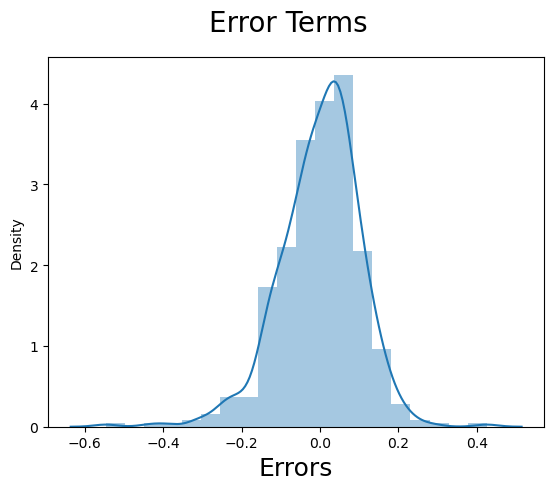

In [73]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_predicted_demand), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [74]:
# Scaling the Features of Test Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_vars = ['temp','atemp','hum','windspeed','cnt']

testData[num_vars] = scaler.fit_transform(testData[num_vars])

In [75]:
testData.describe()

,temp,atemp,hum,windspeed,cnt,seasonEDA_spring,seasonEDA_summer,seasonEDA_winter,yrEDA_2019,monthEDA_Aug,...,monthEDA_Jun,monthEDA_Mar,monthEDA_May,monthEDA_Nov,monthEDA_Oct,monthEDA_Sep,holidayEDA_Not Holiday,workingdayEDA_Working Day,weathersitEDA_Light Rain,weathersitEDA_Misty
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.557520,0.534493,0.506849,0.426941,0.516216,0.255708,0.264840,0.232877,0.479452,0.059361,...,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758,0.963470,0.698630,0.027397,0.319635
std,0.248322,0.224563,0.200659,0.191100,0.238702,0.437258,0.442259,0.423633,0.500722,0.236840,...,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125,0.188034,0.459904,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.354839,0.351351,0.354167,0.307692,0.359882,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.548387,0.540541,0.486111,0.423077,0.520241,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,0.774194,0.729730,0.652778,0.538462,0.682487,1.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [76]:
y_test = testData.pop('cnt')
X_test = testData

In [77]:
X_test_m14 = sm.add_constant(X_test)

In [78]:
X_test_m14 = X_test_m14.drop(["monthEDA_Oct", "atemp", "monthEDA_Aug", 'monthEDA_Mar', 
                            'monthEDA_Jun', 'monthEDA_May' , 'monthEDA_Feb', 'workingdayEDA_Working Day' , 
                            'hum', 'holidayEDA_Not Holiday', 'temp', 'monthEDA_Jul', 'seasonEDA_winter']
                           , axis = 1)

In [79]:
y_pred_m14 = model_14.predict(X_test_m14)

Text(0, 0.5, 'y_pred')

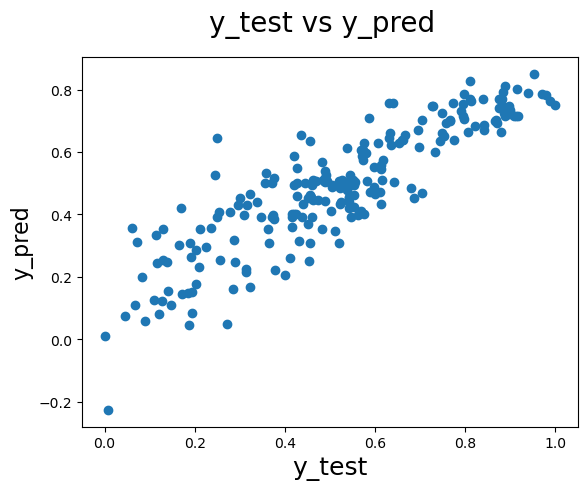

In [80]:
# Model Evaluation
fig = plt.figure()
plt.scatter(y_test, y_pred_m14)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

In [81]:
model_14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     186.0
Date:                Mon, 16 Sep 2024   Prob (F-statistic):          3.07e-161
Time:                        18:16:12   Log-Likelihood:                 434.64
No. Observations:                 510   AIC:                            -847.3
Df Residuals:                     499   BIC:                            -800.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.5860      0.013     44.304      0.000       0.560       0.612
windspeed                   -0.1972      0.029     -6.704      0.000      -0.255      -0.139
seasonEDA_spring            -0.2398      0.015    -16.390      0.000      -0.269      -0.211
seasonEDA_summer            -0.0394      0.013     -3.081      0.002      -0.065      -0.014
yrEDA_2019                   0.2456      0.009     26.470      0.000       0.227       0.264
monthEDA_Dec                -0.1179      0.018     -6.732      0.000      -0.152      -0.083
monthEDA_Jan                -0.1227      0.020     -6.167      0.000      -0.162      -0.084
monthEDA_Nov                -0.1178      0.018     -6.582      0.000      -0.153      -0.083
monthEDA_Sep                 0.0565      0.018      3.070      0.002       0.020       0.093
weathersitEDA_Light Rain    -0.3134      0.028    -11.249      0.000      -0.368      -0.259
weathersitEDA_Misty         -0.0871      0.010     -8.823      0.000      -0.106      -0.068
==============================================================================
Omnibus:                       67.774   Durbin-Watson:                   1.908
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              173.822
Skew:                          -0.673   Prob(JB):                     1.80e-38
Kurtosis:                       5.524   Cond. No.                         8.95
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### We can see that the equation of our best fitted line is:

### cnt  = 0.5860 
###            + 0.2456 * yr_EDA_2019 
###            + 0.0565 * monthEDA_Sep
###            -  0.1972 * windspeed 
###            - 0.2398 * seasonEDA_spring 
###            - 0.0394 * seasonEDA_summer 
###            - 0.1179 * monthEDA_Dec
###            - 0.1227 * monthEDA_Jan 
###            - 0.1178 * monthEDA_Nov 
###            - 0.3134 * weathersitEDA_Light Rain
###            - 0.0871 * weathersitEDA_Misty

